In [1]:
# import packages
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import (
    LogisticRegression
)

from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    GradientBoostingClassifier
)
from imblearn.ensemble import BalancedBaggingClassifier
import xgboost as xgb


from sklearn.cluster import KMeans

from sklearn.svm import (
    LinearSVC,
    SVC
)

from sklearn.metrics import (
    precision_recall_curve, 
    f1_score, 
    roc_curve,
    auc,
    precision_score,
    recall_score,
    mean_squared_error,
    confusion_matrix
)

import scipy.stats as st
import os

from training import (
    plot_auc_roc, plot_recision_recall_f1, 
    plot_countbar, plot_line,
    plot_diff_in_means, plot_cross_tab_heatmap, 
    plot_predictions_by_scores, feature_engineering
)

In [2]:
list_of_file_names = []
for file in os.listdir('data_full_review_cleaned/'):
   if file.endswith(".pkl"):
      list_of_file_names.append(os.path.join(file))

In [3]:
list_of_file_names[0]

'Armani_Beauty_Neo_Nude_Foundation.pkl'

In [4]:
product = list_of_file_names[0].replace('.pkl', '')
product

'Armani_Beauty_Neo_Nude_Foundation'

In [5]:
test = feature_engineering(product_name = list_of_file_names[0])
test_train_X, test_val_X = test.feature_engineering()


In [6]:
test_train_X.columns

Index(['Dark', 'Deep', 'Ebony', 'Fair', 'Light', 'Medium', 'Olive',
       'Porcelain', 'Tan', 'Combination', 'Dry', 'Normal', 'Oily',
       'Combination_Dark', 'Combination_Deep', 'Combination_Ebony',
       'Combination_Fair', 'Combination_Light', 'Combination_Medium',
       'Combination_Olive', 'Combination_Porcelain', 'Combination_Tan',
       'Dry_Dark', 'Dry_Deep', 'Dry_Ebony', 'Dry_Fair', 'Dry_Light',
       'Dry_Medium', 'Dry_Olive', 'Dry_Porcelain', 'Dry_Tan', 'Normal_Dark',
       'Normal_Deep', 'Normal_Ebony', 'Normal_Fair', 'Normal_Light',
       'Normal_Medium', 'Normal_Olive', 'Normal_Porcelain', 'Normal_Tan',
       'Oily_Dark', 'Oily_Deep', 'Oily_Ebony', 'Oily_Fair', 'Oily_Light',
       'Oily_Medium', 'Oily_Olive', 'Oily_Porcelain', 'Oily_Tan',
       'Auburn_hair', 'Black_hair', 'Blonde_hair', 'Brunette_hair',
       'Gray_hair', 'Red_hair', 'Blue_eye', 'Brown_eye', 'Gray_eye',
       'Green_eye', 'Hazel_eye', 'skin_tone_cat', 'finish', 'coverage',
       'shade_mat

In [7]:
len(test_train_X[test_train_X.isna()]) / len(test_train_X)

1.0

In [9]:
test_train_X.columns

Index(['Dark', 'Deep', 'Ebony', 'Fair', 'Light', 'Medium', 'Olive',
       'Porcelain', 'Tan', 'Combination', 'Dry', 'Normal', 'Oily',
       'Combination_Dark', 'Combination_Deep', 'Combination_Ebony',
       'Combination_Fair', 'Combination_Light', 'Combination_Medium',
       'Combination_Olive', 'Combination_Porcelain', 'Combination_Tan',
       'Dry_Dark', 'Dry_Deep', 'Dry_Ebony', 'Dry_Fair', 'Dry_Light',
       'Dry_Medium', 'Dry_Olive', 'Dry_Porcelain', 'Dry_Tan', 'Normal_Dark',
       'Normal_Deep', 'Normal_Ebony', 'Normal_Fair', 'Normal_Light',
       'Normal_Medium', 'Normal_Olive', 'Normal_Porcelain', 'Normal_Tan',
       'Oily_Dark', 'Oily_Deep', 'Oily_Ebony', 'Oily_Fair', 'Oily_Light',
       'Oily_Medium', 'Oily_Olive', 'Oily_Porcelain', 'Oily_Tan',
       'Auburn_hair', 'Black_hair', 'Blonde_hair', 'Brunette_hair',
       'Gray_hair', 'Red_hair', 'Blue_eye', 'Brown_eye', 'Gray_eye',
       'Green_eye', 'Hazel_eye', 'skin_tone_cat', 'finish', 'coverage',
       'shade_mat

In [12]:
len(test.train_X_transformed)

842

In [ ]:
plot_countbar(data = test.data, product = test.product_name, col1 = 'month_of_purchase')

In [ ]:
plot_line(data = test.data, product = test.product_name, col1 = 'days_since_launch')

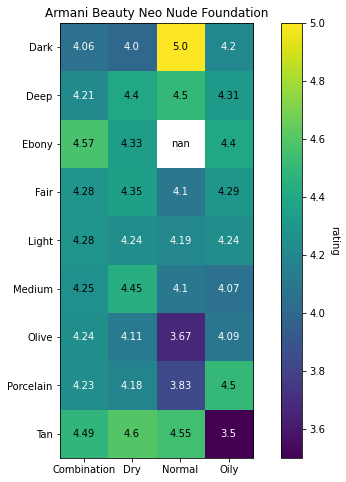

In [13]:
plot_cross_tab_heatmap(data = test.data, product= test.product_name, col1 = 'skin_tone', col2 = 'skin_type', col3 = 'rating')

In [14]:
sum(test.y) / len(test.data)

0.8761429758935994

In [17]:
len(test_train_X[~test_train_X.isna()])

842

In [18]:
len(test_train_X)

842

In [19]:
logit = LogisticRegression(penalty='none',random_state=0, max_iter=1000, class_weight='balanced').fit(test_train_X, test.train_y)

In [20]:
predict_y = logit.predict_proba(test_val_X)[:, 1]

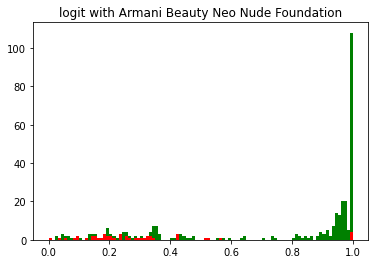

<Figure size 432x288 with 0 Axes>

In [21]:
plot_predictions_by_scores(predict_y, test.val_y, bins = 100, model = 'logit', product= test.product_name)

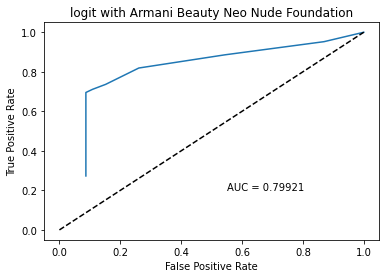

In [22]:
plot_auc_roc(predict_y, test.val_y, product = test.product_name, model = 'logit')

In [23]:
bbc = BalancedBaggingClassifier(random_state=0).fit(test_train_X, test.train_y)
predict_y = bbc.predict_proba(test_val_X)[:, 1]

In [ ]:

Bag = BaggingClassifier(n_estimators=1000, random_state=0).fit(test_train_X, test.train_y)
predict_y = Bag.predict_proba(test_val_X)[:, 1]

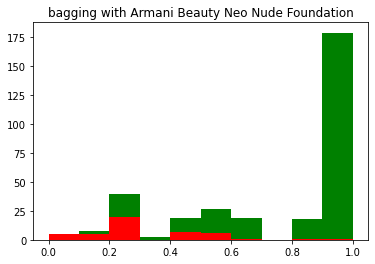

<Figure size 432x288 with 0 Axes>

In [26]:
plot_predictions_by_scores(predict_y, test.val_y, bins = 10, model = 'bagging', product= product)

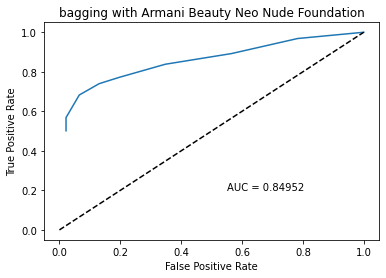

In [27]:
plot_auc_roc(predict_y, test.val_y, product = test.product_name, model = 'bagging')

In [123]:
train_p_1 = len(test.train_y) / (len(test.train_y[test.train_y == 1]) * 2)
train_p_0 = len(test.train_y) / (len(test.train_y[test.train_y == 0]) * 2)

val_p_1 = len(test.val_y) / (len(test.val_y[test.val_y == 1]) * 2) 
val_p_0 = len(test.val_y) / (len(test.val_y[test.val_y == 0]) * 2) 
# val_p = len(test.val_y) / (len(test.val_y) * 2) 
# wj= n_samples / (n_classes * n_samplesj)
w_train = np.where(test.train_y == 0, train_p_0, train_p_1)
w_val = np.where(test.val_y == 0, val_p_0, val_p_1)

dtrain = xgb.DMatrix(test_train_X, label = test.train_y, weight=w_train)
dval = xgb.DMatrix(test_val_X, label = test.val_y, weight=w_val)

In [151]:
param = {'max_depth': 7, 'objective': 'binary:logistic', 'eta': 0.2, 'lambda': 0.5, 'alpha': 0.7, 'gamma': 5}
param['nthread'] = 4
param['eval_metric'] = 'auc'
evallist = [(dval, 'eval'), (dtrain, 'train')]

In [154]:
num_round = 15
bst = xgb.train(param, dtrain, num_round, evallist)

[0]	eval-auc:0.82709	train-auc:0.84736
[1]	eval-auc:0.82709	train-auc:0.84741
[2]	eval-auc:0.84189	train-auc:0.87528
[3]	eval-auc:0.83402	train-auc:0.89143
[4]	eval-auc:0.83827	train-auc:0.89339
[5]	eval-auc:0.84565	train-auc:0.90233
[6]	eval-auc:0.85276	train-auc:0.90949
[7]	eval-auc:0.85276	train-auc:0.90958
[8]	eval-auc:0.85276	train-auc:0.90938
[9]	eval-auc:0.85276	train-auc:0.90845
[10]	eval-auc:0.85197	train-auc:0.90845
[11]	eval-auc:0.85055	train-auc:0.90848
[12]	eval-auc:0.85038	train-auc:0.90960
[13]	eval-auc:0.85024	train-auc:0.90978
[14]	eval-auc:0.85024	train-auc:0.90978


In [155]:
# os.makedirs(f'models/{test.product_name}')
bst.save_model(f'models/{test.product_name}/{test.product_name}_xgboost.model')